In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plot Fig. 1

In [2]:
def pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, kind):

    numerator = 1
    denominator = ((gamma_scale * (-1j * Omega + r) * (-1j * Omega + r + b)**(alpha - 1)) - Omega**2 + omega**2)

    if kind == 'response':
        susceptibility = np.abs(numerator / denominator)
        
    elif kind == 'loss':
        susceptibility = np.imag(numerator / denominator)
        
    elif kind == 'real':
        susceptibility = np.real(numerator / denominator)
        
    return susceptibility

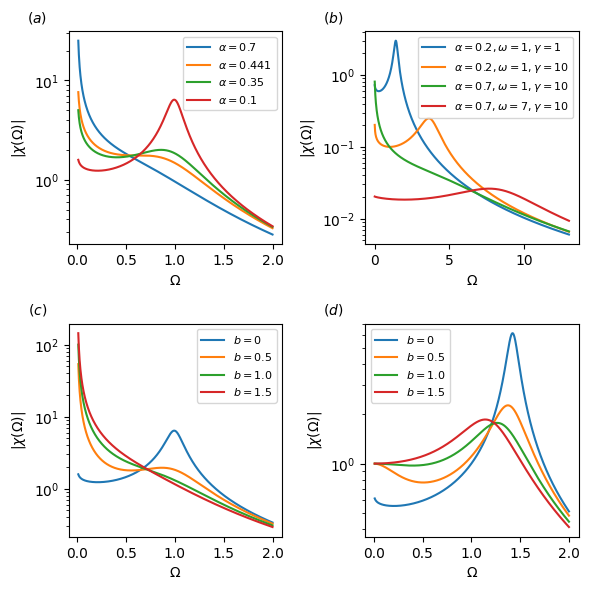

In [43]:
omega = 0
Omega = np.linspace(0.01, 2, 1000)
r = 0
alphas = [0.7, 0.441, 0.35, 0.1]
b = 0

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(6,6))

for r_iter, alpha in enumerate(alphas):
    susceptibility = pl_kernel_susceptibility(Omega, alpha, r, omega, b,1, 'response')
    ax1.plot(Omega, susceptibility, label=f'$\\alpha = {alpha}$')
    ax1.set_yscale('log')
    
ax1.set_xlabel('$\Omega$')
ax1.set_ylabel("$|\chi(\Omega)|$")
ax1.legend()

############################################################################################################
ws = [1, 1, 1, 7]
alphas = [0.2, 0.2, 0.7, 0.7]
gamma_scales = [1, 10, 10, 10]
Omega = np.linspace(0.01, 13, 1000)

for alpha, w, gamma_scale in zip(alphas,ws,gamma_scales):
    susceptibility = pl_kernel_susceptibility(Omega, alpha, r, w, b, gamma_scale, 'response') #Omega, alpha, r, omega, b, gamma_scale, kind
    ax2.plot(Omega, susceptibility, label=f'$\\alpha = {alpha}, \\omega={w}, \\gamma={gamma_scale}$')
    ax2.set_yscale('log')
    
ax2.set_xlabel('$\Omega$')
ax2.set_ylabel("$|\chi(\Omega)|$")
ax2.legend()
############################################################################################################
alpha = 0.1
bs = [0, 0.5, 1.0, 1.5]
Omega = np.linspace(0.01, 2, 1000)

for r_iter, b in enumerate(bs):
    susceptibility = pl_kernel_susceptibility(Omega, alpha, r, omega, b,1, 'response')
    ax3.plot(Omega, susceptibility, label=f'$b = {b}$')
    ax3.set_yscale('log')
    
ax3.set_xlabel('$\Omega$')
ax3.set_ylabel("$|\chi(\Omega)|$")
ax3.legend()
############################################################################################################
alpha = 0.1
omega = 1
bs = [0, 0.5, 1.0, 1.5]
Omega = np.linspace(0.01, 2, 1000)

for r_iter, b in enumerate(bs):
    susceptibility = pl_kernel_susceptibility(Omega, alpha, r, omega, b,1, 'response')
    ax4.plot(Omega, susceptibility, label=f'$b = {b}$')
    ax4.set_yscale('log')
    
ax4.set_xlabel('$\Omega$')
ax4.set_ylabel("$|\chi(\Omega)|$")
ax4.legend()
############################################################################################################
axs = [ax1, ax2, ax3, ax4]

labels = ['$(a)$', '$(b)$', '$(c)$', '$(d)$']
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')

for ax in axs:
    ax.legend(fontsize=8)

fig.tight_layout()
plt.savefig("fig_review_results.pdf", bbox_inches='tight')

## Plot Fig. 2

In [40]:
from scipy.special import gamma
import scipy
import scipy.special as sp
from scipy.integrate import quad
from scipy.optimize import minimize

N = 25
gamma_scale = 1
dt = 1e-3
Tmax = 1000
T = Tmax
steps = int(Tmax/dt)
b = 0

tau_min = dt
tau_max = 10**9
tau_i = np.logspace(np.log10(tau_min), np.log10(tau_max), N)
t_fit = np.logspace(-3, 3, 1000)

alphas = [0.3,0.5,0.8,0.3,0.3,0.3]
rs = [0, 0, 0, 0.2, 0.4, 0.6]

b = 0

kernels = np.zeros((len(t_fit), 6))
i = 0
for alpha, r in zip(alphas, rs):
    
    gamma_r_values = [gamma_r(t, alpha, r, b) for t in t_fit]
    K_target = gamma_scale * np.array(gamma_r_values)
    kernels[:,i] = K_target
    i += 1

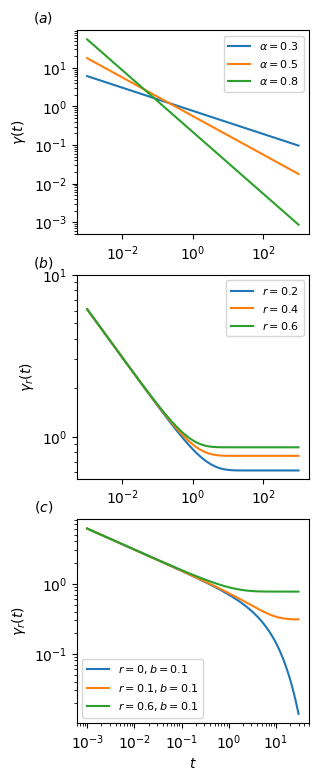

In [41]:
i = 0

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(3,9))

alphas = [0.3,0.5,0.8]
rs = [0, 0, 0]

for alpha, r in zip(alphas, rs):

    ax1.loglog(t_fit, kernels[:,i], label=f'$\\alpha={alpha}$')
    i += 1
    
alphas = [0.3,0.3,0.3]
rs = [0.2, 0.4, 0.6]

i = 3

for alpha, r in zip(alphas, rs):

    ax2.loglog(t_fit, kernels[:,i], label=f'$r={r}$')
    ax2.set_yticks([1e0, 1e1])
    ax2.set_yticklabels([r'$10^{0}$', r'$10^{1}$'])

    K_target = gamma_scale * np.array(gamma_r_values)
    i+=1

Tmax = 30
T = Tmax
steps = int(Tmax/dt)

tau_min = dt
tau_max = 10**9
tau_i = np.logspace(np.log10(tau_min), np.log10(tau_max), N)
t_fit2 = np.logspace(-3, np.log10(Tmax), 1000)

alphas = [0.3,0.3,0.3]
rs = [0, 0.1, 0.6]
bs = [0.1,0.1,0.1]

for alpha, r, b in zip(alphas, rs, bs):
    
    gamma_r_values = [gamma_r(t, alpha, r, b) for t in t_fit2]
    K_target = gamma_scale * np.array(gamma_r_values)
    ax3.loglog(t_fit2, K_target, label=f'$r={r}, b={b}$')
    
ax1.legend()
ax2.legend()
ax3.legend()

#ax1.set_xlabel('$t$')
ax1.set_ylabel('$\\gamma(t)$')

#ax2.set_xlabel('$t$')
ax2.set_ylabel('$\\gamma_r(t)$')

ax3.set_xlabel('$t$')
ax3.set_ylabel('$\\gamma_r(t)$')

axs = [ax1, ax2, ax3]

labels = ['$(a)$', '$(b)$', '$(c)$']
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')

for ax in axs:
    ax.legend(fontsize=8)


plt.savefig("memory_kernels.pdf", bbox_inches='tight')

## Plot Fig. 3

In [75]:
Response_vec = np.load('Response_vec_fig3.npy')
omega_drives = np.linspace(0.1,2,10)

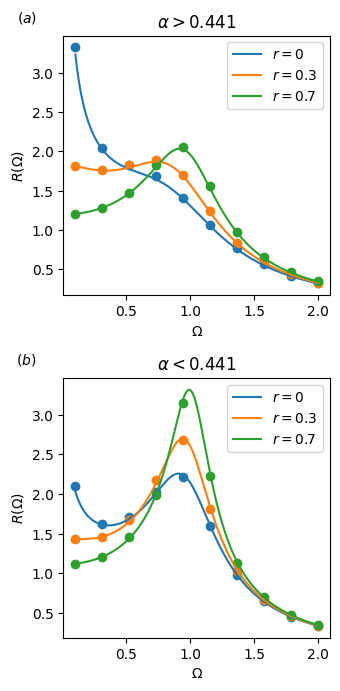

In [81]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

rs = [0, 0.3, 0.7]
alphas = [0.5, 0.5, 0.5]

gamma_scale = 1
Omega = np.linspace(0.1,2,1000)
omega = 0
b = 0
kind = 'response'

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(3.5,7))

par_iter = 0
for r, alpha in zip(rs, alphas):
    ax1.plot(Omega,pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, kind), label=f'$r={r}$')
    ax1.scatter(omega_drives, Response_vec[:,par_iter])
    par_iter += 1


    
#left, bottom, width, height = [0.7, 0.7, 0.2, 0.2]
#ax3 = fig.add_axes([left, bottom, width, height])

#max_Omegas_r = [find_max_Omega(0.5, r, 0, 0) for r in np.linspace(0.01, 1, 300)]

#ax3.plot(np.linspace(0.01, 1, 300),max_Omegas_r)


# axins = inset_axes(ax1, width="30%", height="30%", loc='upper right')
# axins.plot(r_values, max_Omegas_r)
# axins.set_xlabel('$r$', fontsize=7)
# axins.set_ylabel('$\Omega_R$', fontsize=7)
# axins.tick_params(axis='both', which='major', labelsize=5)

rs = [0, 0.3, 0.7]
alphas = [0.3, 0.3, 0.3]

par_iter = 3

for r, alpha in zip(rs, alphas):
    ax2.plot(Omega,pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, kind), label=f'$r={r}$')
    ax2.scatter(omega_drives, Response_vec[:,par_iter])
    par_iter += 1


#max_Omegas_r = [find_max_Omega(0.3, r, 0, 0) for r in np.linspace(0.01, 1, 300)]

#ax3.plot(np.linspace(0.01, 1, 300),max_Omegas_r)

#ax2.set_xlim(0,2.2)

# axins = inset_axes(ax2, width="30%", height="30%", loc='upper right')
# axins.plot(r_values, max_Omegas_r)
# axins.set_xlabel('$r$', fontsize=7)
# axins.set_ylabel('$\Omega_R$', fontsize=7)
# axins.tick_params(axis='both', which='major', labelsize=5)


ax1.set_xlabel('$\Omega$')
ax2.set_xlabel('$\Omega$')

ax1.set_ylabel("$R(\Omega)$")
ax2.set_ylabel("$R(\Omega)$")

ax1.legend()
ax2.legend()

ax1.set_title('$\\alpha>0.441$')
ax2.set_title('$\\alpha<0.441$')

axs = [ax1, ax2]

labels = ['$(a)$', '$(b)$']
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')

#ax1.legend(fontsize=8,bbox_to_anchor=(0.1, 0.7))
#ax2.legend(fontsize=8,bbox_to_anchor=(0.35, 0.7))

ax1.legend(fontsize=10)
ax2.legend(fontsize=10)

fig.tight_layout()

plt.savefig("sr-b0-w0-specific-r.pdf", bbox_inches='tight')

## Plot Fig. 4

In [7]:
from scipy.optimize import minimize_scalar

def func(Omega, alpha, r, omega, b):
    return np.abs(1 / ((-1j * Omega + r) * (-1j * Omega + r + b)**(alpha - 1) - Omega**2 + omega**2))

def find_max_Omega(alpha, r, omega, b):

    def neg_func(Omega):
        return -func(Omega, alpha, r, omega, b)
    
    result = minimize_scalar(neg_func, bounds=(0, 10), method='bounded')
    max_Omega = result.x
    return max_Omega

alpha_values = np.linspace(0.05, 1, 300)
r_values = np.linspace(0.01, 1, 300)
b = 0

omega = 0

max_Omegas = np.zeros((len(alpha_values), len(r_values)))
func1 = np.zeros((len(alpha_values), len(r_values)))
mask1 = np.zeros((len(alpha_values), len(r_values)))

for i, alpha in enumerate(alpha_values):
    for j, r in enumerate(r_values):
        max_Omegas[i, j] = find_max_Omega(alpha, r, omega, b)
        if max_Omegas[i, j] < 10**(-4):
            mask1[i,j] = True
        else:
            mask1[i, j] = False
        func1[i,j] = func(max_Omegas[i, j], alpha, r, omega, b)


omega = 0.5
max_Omegas2 = np.zeros((len(alpha_values), len(r_values)))
func2 = np.zeros((len(alpha_values), len(r_values)))
mask2 = np.zeros((len(alpha_values), len(r_values)))

for i, alpha in enumerate(alpha_values):
    for j, r in enumerate(r_values):
        max_Omegas2[i, j] = find_max_Omega(alpha, r, omega, b)
        
        if max_Omegas2[i, j] < 10**(-4):
            mask2[i, j] = True
        else:
            mask2[i, j] = False
        func2[i,j] = func(max_Omegas2[i, j], alpha, r, omega, b)

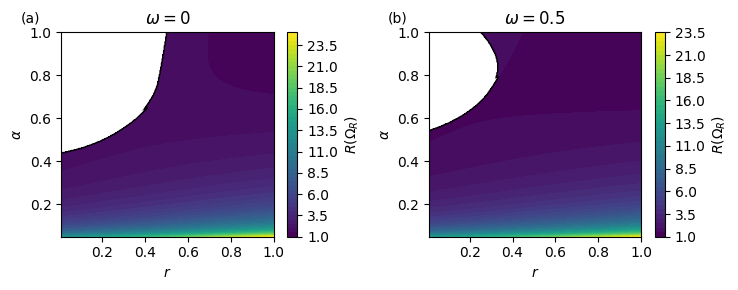

In [16]:
Rgrid, Agrid = np.meshgrid(r_values, alpha_values)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 3))


masked_func1 = np.ma.masked_where(mask1, func1)

cf1 = ax1.contourf(
    r_values,
    alpha_values,
    masked_func1,
    levels=50,
    cmap="viridis",
)
fig.colorbar(cf1, ax=ax1, label=r"$R(\Omega_R)$")


sep1 = ax1.contour(
    r_values,
    alpha_values,
    mask1.astype(float),
    levels=[0.1],
    colors="k",
    linewidths=1.0,
)


ax1.set_xlabel(r"$r$")
ax1.set_ylabel(r"$\alpha$")
ax1.set_title(r"$\omega = 0$")


masked_func2 = np.ma.masked_where(mask2, func2)

cf2 = ax2.contourf(
    r_values,
    alpha_values,
    masked_func2,
    levels=50,
    cmap="viridis",
)

fig.colorbar(cf2, ax=ax2, label=r"$R(\Omega_R)$")

sep2 = ax2.contour(
    r_values,
    alpha_values,
    mask2.astype(float),
    levels=[0.1],
    colors="k",
    linewidths=1.0,
)

ax2.set_xlabel(r"$r$")
ax2.set_ylabel(r"$\alpha$")
ax2.set_title(r"$\omega = 0.5$")

fig.tight_layout()

axs  = [ax1, ax2]
labels = ["(a)", "(b)"]
for i, ax in enumerate(axs):
    ax.text(
        -0.1, 1.1, labels[i], transform=ax.transAxes,
        fontsize=10, va="top", ha="right"
    )

plt.show()
fig.savefig("fig_2phase_diagrams.pdf", bbox_inches='tight')

## Plot Fig. 5

In [10]:
Response_vec = np.load('Response_vec_fig5.npy')
omega_drives = np.linspace(0.1,2,10)

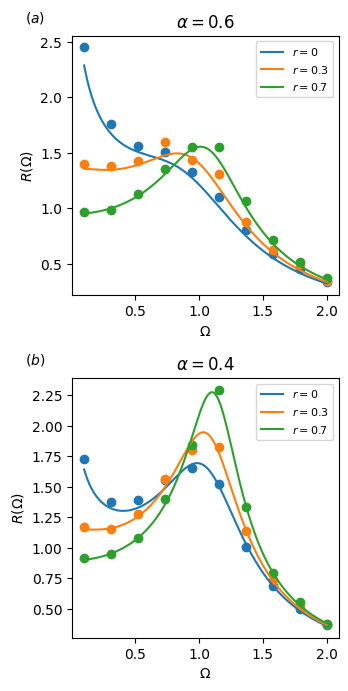

In [11]:
b = 0
kind = 'response'
omega = 0.5


rs = [0, 0.3, 0.7]
alphas = [0.6, 0.6, 0.6]


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(3.5,7))

par_iter = 0
for r, alpha in zip(rs, alphas):
    ax1.plot(Omega,pl_kernel_susceptibility(Omega, alpha, r, omega, b, kind), label=f'$r={r}$')
    ax1.scatter(omega_drives, Response_vec[:,par_iter])
    par_iter += 1

rs = [0, 0.3, 0.7]
alphas = [0.4, 0.4, 0.4]

par_iter = 3
for r, alpha in zip(rs, alphas):
    ax2.plot(Omega,pl_kernel_susceptibility(Omega, alpha, r, omega, b, kind), label=f'$r={r}$')
    ax2.scatter(omega_drives, Response_vec[:,par_iter])
    par_iter += 1


ax1.set_xlabel('$\Omega$')
ax2.set_xlabel('$\Omega$')

ax1.set_ylabel("$R(\Omega)$")
ax2.set_ylabel("$R(\Omega)$")

ax1.legend()
ax2.legend()

ax1.set_title('$\\alpha=0.6$')
ax2.set_title('$\\alpha=0.4$')

axs = [ax1, ax2]

labels = ['$(a)$', '$(b)$']
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')

for ax in axs:
    ax.legend(fontsize=8)
    
fig.tight_layout()

plt.savefig("sr-b0-w05-specific-r.pdf", bbox_inches='tight')

## Plot Fig. 6

In [ ]:
from scipy.optimize import minimize_scalar

def func(Omega, alpha, r, omega, b):
    return np.abs(1 / (((-1j * Omega + r) * ((-1j * Omega + r + b) ** (alpha - 1))) - Omega**2 + omega**2))

def find_max_Omega(alpha, r, omega, b):
    def neg_func(Omega):
        return -func(Omega, alpha, r, omega, b)
    result = minimize_scalar(neg_func, bounds=(0, 10), method='bounded')
    return result.x


r_values = np.linspace(0.01, 1, 300)

fig, axes = plt.subplots(1, 3, figsize=(8, 3))

# First subplot

for alpha in [0.3, 0.5, 0.7]:
    max_Omegas = [find_max_Omega(alpha, r, 0, 0) for r in r_values]
    axes[0].plot(r_values, max_Omegas, label=f'$\\alpha$ = {alpha}')
axes[0].set_xlabel('Resetting rate, $r$')
axes[0].set_ylabel(r'Resonant frequency, $\Omega_R$')
axes[0].set_title('$\\omega=0, b=0$')
axes[0].legend(fontsize=8)

# Second subplot

alpha_fixed = 0.6

for omega in [0.1, 0.5, 0.7]:
    max_Omegas = [find_max_Omega(alpha_fixed, r, omega, 0) for r in r_values]
    axes[1].plot(r_values, max_Omegas, label=f'$\\omega$ = {omega}')

axes[1].set_xticks([0, 0.25, 0.5, 0.75, 1])
axes[1].set_xlabel('Resetting rate, $r$')
axes[1].set_ylabel(r'Resonant frequency, $\Omega_R$')
axes[1].set_title('$\\alpha=0.6, b=0$')
axes[1].legend(fontsize=8)

alpha_fixed = 0.5
omega_fixed = 0

# Third subplot

for b in [0.1, 0.5, 1.5]:
    max_Omegas = [find_max_Omega(alpha_fixed, r, omega_fixed, b) for r in r_values]
    axes[2].plot(r_values, max_Omegas, label=f'$b$ = {b}')
axes[2].set_xlabel('Resetting rate, $r$')
axes[2].set_ylabel(r'Resonant frequency, $\Omega_R$')
axes[2].set_title(f'$\\alpha={alpha_fixed}, \\omega={omega_fixed}$')
axes[2].legend(fontsize=8)


labels = ['$(a)$', '$(b)$', '$(c)$']
for i, ax in enumerate(axes):
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10)
    
plt.tight_layout()
fig.savefig('first-order-transition.pdf', bbox_inches='tight')

## Plot Fig. 7

In [3]:
Response_vec = np.load('Response_vec_fig7.npy')

omega_drives = np.linspace(0.1,2,10)

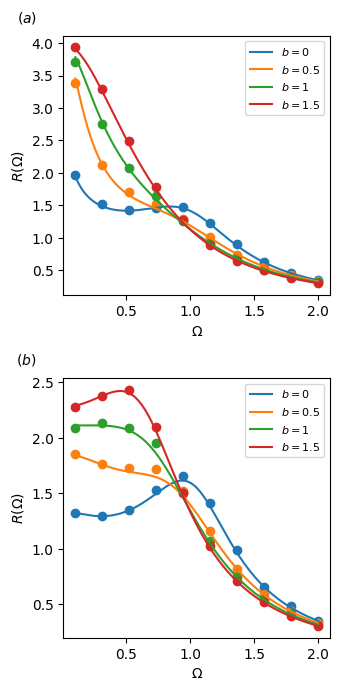

In [5]:
b = 0.5
kind = 'response'
omega = 0.5
Omega = np.linspace(0.1,2,1000)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(3.5, 7)) # 3.5 x 7 #

rs = [0, 0, 0, 0]
bs = [0, 0.5, 1, 1.5]
gamma_scale = 1
alpha = 0.5
omega = 0.5
Omega = np.linspace(0.1,2,1000)

par_iter = 0
for r, b in zip(rs, bs):
    ax1.plot(Omega,pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, kind), label=f'$b={b}$')
    ax1.scatter(omega_drives, Response_vec[:,par_iter])
    par_iter += 1

rs = [0.25, 0.25, 0.25, 0.25]
bs = [0, 0.5, 1, 1.5]

par_iter = 4
for r, b in zip(rs, bs):
    ax2.plot(Omega,pl_kernel_susceptibility(Omega, alpha, r, omega, b,gamma_scale, kind), label=f'$b={b}$')
    ax2.scatter(omega_drives, Response_vec[:,par_iter])

    par_iter += 1
    
ax1.set_xlabel('$\Omega$')
ax2.set_xlabel('$\Omega$')

ax1.set_ylabel("$R(\Omega)$")
ax2.set_ylabel("$R(\Omega)$")

ax1.legend()
ax2.legend()


axs = [ax1, ax2]

labels = ['$(a)$', '$(b)$']
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')

for ax in axs:
    ax.legend(fontsize=8)
    
fig.tight_layout()

plt.savefig("sr-b_w05.pdf", bbox_inches='tight')

## Plot Fig. 8

In [69]:
from scipy.optimize import minimize_scalar

def func(Omega, alpha, r, omega, b):
    return np.abs(1 / ((-1j * Omega + r) * (-1j * Omega + r + b)**(alpha - 1) - Omega**2 + omega**2))

def find_max_Omega(alpha, r, omega, b):

    def neg_func(Omega):
        return -func(Omega, alpha, r, omega, b)
    
    result = minimize_scalar(neg_func, bounds=(0, 10), method='bounded')
    max_Omega = result.x
    return max_Omega

alpha_values = [0.8, 0.5, 0.2]
b_values = np.linspace(0, 2, 300)
r_values = np.linspace(0.01, 1, 300)
omega = 0.5

max_Omegas = np.zeros((len(b_values), len(r_values), len(alpha_values)))
max_omegas_2 = np.zeros((len(b_values), len(r_values), len(alpha_values)))

for a, alpha in enumerate(alpha_values):
    for i, b in enumerate(b_values):
        for j, r in enumerate(r_values):
            
            if find_max_Omega(alpha, r, omega, b) > 0.1:
                max_Omegas[i, j, a] = 1
            else:
                max_Omegas[i, j, a] = 0
                
            max_omegas_2[i,j,a] = find_max_Omega(alpha, r, omega, b)

X, Y = np.meshgrid(r_values, b_values)

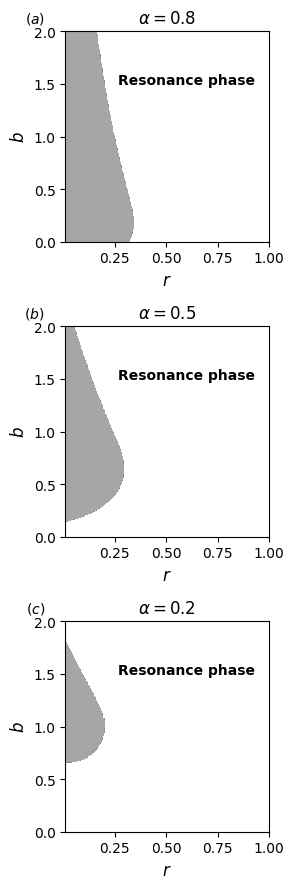

In [70]:
import matplotlib.colors as mcolors

fig, axs = plt.subplots(3, 1, figsize=(3, 9))
a = 0
cmap = mcolors.ListedColormap([(0.5, 0.5, 0.5, 0.7),
                               (1, 1, 1, 1.0)])

for ax, alpha in zip(axs.flatten(), alpha_values):
    Z = max_Omegas[:, :, a]
    contour = ax.contourf(X, Y, Z, cmap=cmap)
    #plt.colorbar(label=r'Max $\Omega$')
    #fig.colorbar(contour, ax=ax)
    ax.set_xlabel('$r$',fontsize=12)
    ax.set_ylabel('$b$',fontsize=12)
    ax.set_title(f'$\\alpha={alpha}$')
    
    a+=1

fig.tight_layout()

labels = ['$(a)$', '$(b)$', '$(c)$']
for i, ax in enumerate(axs):
    axs[i].text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')


axs[0].text(0.6, 1.5, 'Resonance phase', color='black', fontsize=10, ha='center', fontweight='bold')
axs[1].text(0.6, 1.5, 'Resonance phase', color='black', fontsize=10, ha='center', fontweight='bold')
axs[2].text(0.6, 1.5, 'Resonance phase', color='black', fontsize=10, ha='center', fontweight='bold')

fig.savefig("fig_resonance_r_b.pdf", bbox_inches='tight')

## Plot Fig. 9

In [46]:
def chi(Omega, omega, r, b, alpha):

    R1 = np.sqrt(r**2 + Omega**2)
    R2 = np.sqrt((r + b)**2 + Omega**2)
    
    theta1 = np.arctan2(Omega, r)
    theta2 = np.arctan2(Omega, r + b)
    
    A = omega**2 - Omega**2 + R1 * (R2**(alpha - 1)) * np.cos(theta1 + (alpha - 1) * theta2)
    B = R1 * (R2**(alpha - 1)) * np.sin(theta1 + (alpha - 1) * theta2)
    
    D_sq = A**2 + B**2
    
    chi_real = A / D_sq
    chi_imag = B / D_sq
    
    return chi_real, chi_imag

In [47]:
Loss_vec = np.load('Loss_vec_fig9.npy')
omega_drives = np.linspace(0.01,2,15)

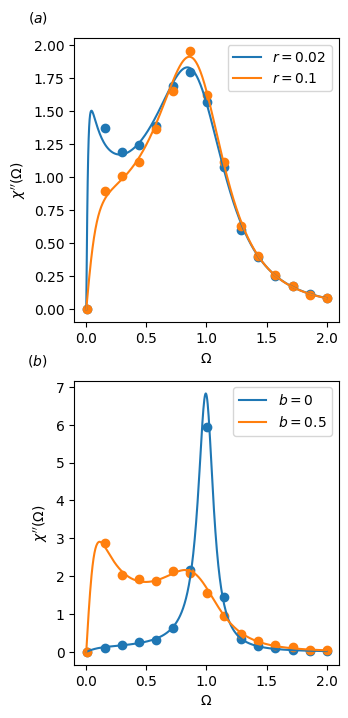

In [50]:
omega = 0
Omega = np.linspace(0.00000001, 2, 500)
kind = 'loss'
gamma_scale = 1


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(3.5,7))

rs = [0.02, 0.1]
alphas = [0.4, 0.4]
bs = [0, 0]

par_iter = 0
for r, b, alpha in zip(rs, bs, alphas):
    _,y = chi(Omega, omega, r, b, alpha)
    
    ax1.plot(Omega,y, label=f'$r={r}$')
    ax1.scatter(omega_drives, -Loss_vec[:,par_iter])
    par_iter += 1

rs = [0.1, 0.1]
alphas = [0.1, 0.1]
bs = [0, 0.5]

par_iter = 2

for r, b, alpha in zip(rs, bs, alphas):
    _,y = chi(Omega, omega, r, b, alpha)
    
    ax2.plot(Omega, y, label=f'$b={b}$')
    ax2.scatter(omega_drives, -Loss_vec[:,par_iter])

    par_iter += 1

ax1.legend()
ax2.legend()

ax1.set_xlabel('$\Omega$')
ax2.set_xlabel('$\Omega$')

ax1.set_ylabel("$\\chi''(\Omega)$")
ax2.set_ylabel("$\\chi''(\Omega)$")


fig.tight_layout()

axs = [ax1, ax2]

labels = ['$(a)$', '$(b)$']
for i, ax in enumerate(axs):
    axs[i].text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')


plt.savefig("double_peak_simulations.pdf", bbox_inches='tight')

## Plot Fig. 10

In [ ]:
from scipy.signal import find_peaks

alphas = np.linspace(0, 1, 300)
rs = np.linspace(0.0000000001, 0.1, 300)
X, Y = np.meshgrid(rs, alphas)

Omega = np.linspace(0.000000000001, 2, 500)
kind = 'loss'
gamma_scale = 1

phase = np.zeros_like(X, dtype=int)
b = 0
omega = 0
for i in range(len(rs)):
    for j in range(len(alphas)):
        _,y = chi(Omega, omega, X[i,j], b, Y[i,j])
        peaks, _ = find_peaks(y, prominence=0.00000000000001)
        phase[i,j] = len(peaks)

rs = np.linspace(0.0000000001, 0.22, 300)      
phase2 = np.zeros_like(X, dtype=int)
X, Y = np.meshgrid(rs, alphas)

b = 0.5
omega = 0

for i in range(len(rs)):
    for j in range(len(alphas)):
        _,y = chi(Omega, omega, X[i,j], b, Y[i,j])
        peaks, _ = find_peaks(y, prominence=0.00000000000001)
        phase2[i,j] = len(peaks)
        
b = 0.5
omega = 0.5
rs = np.linspace(0.0000000001, 0.1, 300)
X, Y = np.meshgrid(rs, alphas)

phase3 = np.zeros_like(X, dtype=int)

for i in range(len(rs)):
    for j in range(len(alphas)):
        _,y = chi(Omega, omega, X[i,j], b, Y[i,j])
        peaks, _ = find_peaks(y, prominence=0.00000000000001)
        phase3[i,j] = len(peaks)

In [ ]:
import matplotlib.colors as mcolors

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(3,9))

cmap = mcolors.ListedColormap([(0.5, 0.5, 0.5, 0.7),
                               (1, 1, 1, 1.0)])

rs = np.linspace(0.0000000001, 0.1, 300)
X, Y = np.meshgrid(rs, alphas)

ax1.contourf(X, Y, np.array(phase,dtype=float), levels=3, cmap=cmap)

rs = np.linspace(0.0000000001, 0.22, 300)
X, Y = np.meshgrid(rs, alphas)

ax2.contourf(X, Y, np.array(phase2,dtype=float), levels=3, cmap=cmap)

rs = np.linspace(0.0000000001, 0.1, 300)
X, Y = np.meshgrid(rs, alphas)

ax3.contourf(X, Y, np.array(phase3,dtype=float), levels=3, cmap=cmap)


ax1.set_xlabel('$r$')
ax1.set_ylabel('$\\alpha$')
ax1.set_title('$\\omega=0, b=0$')

ax2.set_xlabel('$r$')
ax2.set_ylabel('$\\alpha$')
ax2.set_title('$\\omega=0, b=0.5$')

ax3.set_xlabel('$r$')
ax3.set_ylabel('$\\alpha$')
ax3.set_title('$\\omega=0.5, b=0.5$')

fig.tight_layout()

axs = [ax1, ax2, ax3]

labels = ['$(a)$', '$(b)$', '$(c)$']
for i, ax in enumerate(axs):
    axs[i].text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')


ax1.text(0.035, 0.45, 'Double-peak', color='black', fontsize=10, ha='center', fontweight='bold')
ax2.text(0.1, 0.1, 'Double-peak', color='black', fontsize=10, ha='center', fontweight='bold')
ax3.text(0.04, 0.2, 'Double-peak', color='black', fontsize=10, ha='center', fontweight='bold')

plt.savefig("double_peak_phenomenon2.pdf", bbox_inches='tight')

## Plot Fig. 11

In [14]:
alpha = 0.1
Omega = np.logspace(-10, 10, 10000)
omega = 1
gamma_scale = 10

r = 0
b = 0

chi1 = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'real')
chi2 = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'loss')
###############################################################################################
r = 0.5
b = 0

chi1_ = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'real')
chi2_ = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'loss')
###############################################################################################
r = 0
b = 1.5

chi1__ = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'real')
chi2__ = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'loss')
###############################################################################################
r = 1
b = 1.5

chi1___ = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'real')
chi2___ = pl_kernel_susceptibility(Omega, alpha, r, omega, b, gamma_scale, 'loss')

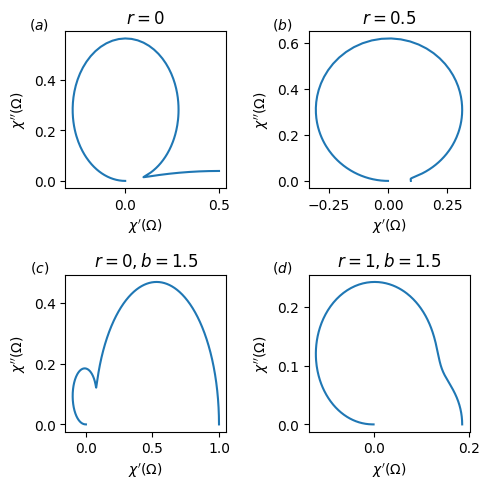

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(5,5))

ax1.plot(chi1, chi2)
ax1.set_xlabel("$\chi'(\Omega)$")
ax1.set_ylabel("$\chi''(\Omega)$")
ax1.set_title('$r=0$')

ax2.plot(chi1_, chi2_)
ax2.set_xlabel("$\chi'(\Omega)$")
ax2.set_ylabel("$\chi''(\Omega)$")
ax2.set_title('$r=0.5$')

ax3.plot(chi1__, chi2__)
ax3.set_xlabel("$\chi'(\Omega)$")
ax3.set_ylabel("$\chi''(\Omega)$")
ax3.set_title('$r=0, b=1.5$')

ax4.plot(chi1___, chi2___)
ax4.set_xlabel("$\chi'(\Omega)$")
ax4.set_ylabel("$\chi''(\Omega)$")
ax4.set_title('$r=1, b=1.5$')

fig.tight_layout()


axs = [ax1, ax2, ax3, ax4]
labels = ['$(a)$', '$(b)$', '$(c)$', '$(d)$']
for i, ax in enumerate(axs):
    axs[i].text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')

fig.savefig("fig_cole_cole.pdf", bbox_inches='tight')

## Plot Fig. 12

In [72]:
from scipy.special import gamma
import scipy
import scipy.special as sp
from scipy.integrate import quad
from scipy.optimize import minimize

alpha = 0.5
N = 25
gamma_scale = 1
dt = 1e-3
Tmax = 100
T = Tmax
steps = int(Tmax/dt)
b = 0

trajs = 30
w=0
A_0 = 1
omega_drive = 0.92
rs = [0,0.7]
X_Vecs = np.zeros((steps,trajs,len(rs)))


tau_min = dt
tau_max = 10**9
tau_i = np.logspace(np.log10(tau_min), np.log10(tau_max), N)


t_fit = np.logspace(-3, np.log10(Tmax), 1000)

# Define gamma(t)
def gamma_t(t, alpha, b):
    if t == 0:
        return np.inf
    return np.exp(-b*t) * (t**(-alpha)/ gamma(1-alpha))


def gamma_r(t, alpha, r, b):
    if t == 0:
        return np.inf
    first_term = np.exp(-r * t) * gamma_t(t, alpha, b)
    integral_func = lambda t_prime: np.exp(-r * t_prime) * gamma_t(t_prime, alpha, b) * r
    second_term, _ = quad(integral_func, 0, t)
    return first_term + second_term

def objective(c):
    return np.sum((A @ c - K_target)**2)

for r_iter,r in enumerate(rs):
    
    gamma_r_values = [gamma_r(t, alpha, r, b) for t in t_fit]

    K_target = gamma_scale * np.array(gamma_r_values)

    A = np.exp(-np.outer(t_fit, 1.0/tau_i))

    c_init = np.ones(N)

    bounds = [(0, None) for _ in range(N)]  # c_i >= 0

    result = minimize(objective, c_init, bounds=bounds, method='L-BFGS-B')

    c_i = result.x

    X_Vec = np.zeros((steps, trajs))

    x = np.zeros(trajs)
    v = np.random.normal(0,1, size=trajs)
    z = np.random.normal(0,np.sqrt(c_i), size=(trajs,N))


    for step in range(steps):
        t = step*dt

        noise_prefactor = np.sqrt(c_i/tau_i)
        xi = np.sqrt(2)*np.random.normal(0,1,size=(trajs,N))
        xi *= np.sqrt(dt)

        dx = v
        dv = np.sum(z,axis=1) - w**2*x + A_0 * np.cos(omega_drive * t)
        dz = (-(z / tau_i) - v[:, np.newaxis] * c_i)*dt + noise_prefactor*xi

        x += dx * dt
        v += dv * dt
        z += dz

        X_Vec[step,:] = x

    X_Vecs[:,:,r_iter] = X_Vec
    
    print(r_iter)

0
1


In [73]:
t_grid = np.linspace(dt,100,steps)

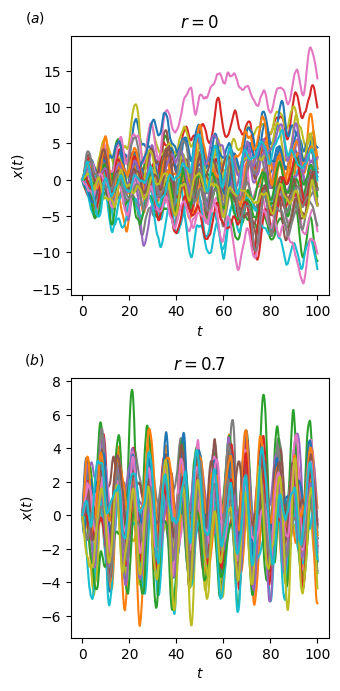

In [74]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(3.5,7))

ax1.plot(t_grid,X_Vecs[:,:,0])
ax1.set_title('$r=0$')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x(t)$')

ax2.plot(t_grid,X_Vecs[:,:,1])
ax2.set_title('$r=0.7$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$x(t)$')

axs = [ax1, ax2]

labels = ['$(a)$', '$(b)$']
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes,
            fontsize=10, va='top', ha='right')
    
fig.tight_layout()

fig.savefig("fig_trajs.pdf", bbox_inches='tight')